<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#polynomial-Regression" data-toc-modified-id="polynomial-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>polynomial Regression</a></span></li></ul></div>

In [17]:
import pandas as pd

wine_df = pd.read_csv("WineQT.csv")

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [8]:
# styles for seaborn and matplotlib 
plt.style.use("ggplot")
sns.set_palette("viridis")

In [10]:
# styles seaborn and matplotlib 
# plt.style.use("seaborn-v0_8-whitegrid")
# sns.set_palette("viridis")

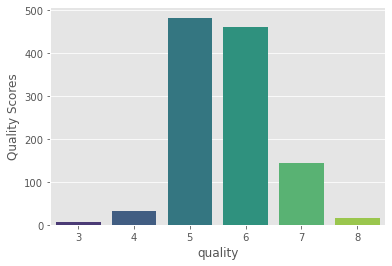

In [13]:
# countplot of the values on the qaulity 
sns.countplot(x="quality", data=wine_df)
plt.show()

## Linear Regression 
- models a linear relationship

In [14]:
x_all_features = wine_df.drop("quality", axis=1)
y_target = wine_df["quality"]

In [16]:
# split the data 70:30 
x_train_all,x_test_all, y_train, y_test = train_test_split(x_all_features, y_target, test_size=0.3, random_state=42)

In [18]:
# selected alcohol hypothesis have a linear relationship with quality

x_train_simple = x_train_all[["alcohol"]]
x_test_simple = x_test_all[["alcohol"]]

# fit linear relation model 
model_simple_linear = LinearRegression()
model_simple_linear.fit(x_train_simple, y_train)

LinearRegression()

In [19]:
# coefficients 

slope_simple = model_simple_linear.coef_[0]
intercept_simple = model_simple_linear.intercept_

print(f"\simple linera model:quality = {intercept_simple:.2f}+{slope_simple:.2f}*alcohol")

\simple linera model:quality = 1.84+0.37*alcohol


In [23]:
# y = b + mx 
# simple prediction 
p_quality = 1.69 + (0.37*6.56)
print(p_quality)
y_pred_simple_test = model_simple_linear.predict(x_test_simple)

4.1172


In [25]:
# evaluate on test set 

r2_simple_test = r2_score(y_test,y_pred_simple_test)
mse_simple_test = mean_squared_error(y_test,y_pred_simple_test)
print(f"Test R-Squared: {r2_simple_test}")
print(f"MSE:{mse_simple_test}")

Test R-Squared: 0.2649750315401941
MSE:0.42736145604743403


## polynomial Regression 

In [29]:
feature_for_poly = "alcohol"
x_train_poly_feature = x_train_all[[feature_for_poly]]
x_test_poly_feature = x_test_all[[feature_for_poly]]

In [32]:
degree = 1 # defines a linear relationship 
poly_transformer = PolynomialFeatures(degree = degree)
x_train_poly = poly_transformer.fit_transform(x_test_poly_feature)
x_test_poly = poly_transformer.fit_transform(x_test_poly_feature)

In [33]:
poly_feature_names = poly_transformer.get_feature_names_out([feature_for_poly])
print(f"Polynomial features (degree: {degree}:{poly_feature_names}")

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names_out'

In [34]:
model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [343, 800]